# API de Gemini: Inicio rápido con Python

Inspirado en la documentación original

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/python_quickstart"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import pathlib
import textwrap
import os

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [2]:
from dotenv import load_dotenv

load_dotenv()  # toma variables de entorno del archivo .env. Debes crearlo si no existe

True

In [3]:
GOOGLE_API_KEY = os.environ["GOOGLE_API_KEY"]

if not GOOGLE_API_KEY:
    raise Exception("Hubo un problema con la API KEY")
genai.configure(api_key=GOOGLE_API_KEY)

## Veamos los modelos disponibles

Ahora estamos listos para llamar a la API de Gemini. Utiliza list_models para ver los modelos de Gemini disponibles:

- `gemini-pro`: optimizado para mensajes de solo texto.
- `gemini-pro-vision`: optimizado para mensajes de texto e imágenes.

In [4]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Genera texto a partir de entradas de texto

Para mensajes de solo texto, use el modelo `gemini-pro`:

In [13]:
model = genai.GenerativeModel('gemini-pro')

In [28]:
%%time
respuesta = model.generate_content("¿Quién es el Joe Arroyo y por qué es famoso?")

CPU times: user 11.2 ms, sys: 8.53 ms, total: 19.8 ms
Wall time: 6.34 s


En casos simples, todo lo que se necesita es `respuesta.text`. Para mostrar texto Markdown formateado, usa la función `to_markdown` que se definió al inicio:

In [29]:
to_markdown(respuesta.text)

> **Álvaro José Arroyo González**, conocido como **Joe Arroyo**, fue un cantante, compositor y arreglista colombiano que nació el 1 de noviembre de 1955 y falleció el 26 de julio de 2011.
> 
> **Por qué es famoso:**
> 
> Joe Arroyo es reconocido por:
> 
> * **Su distintivo estilo musical:** Fusionó ritmos caribeños tradicionales como la salsa, el cumbión y el porro con elementos de otras músicas como el jazz y el funk.
> * **Sus letras socialmente conscientes:** Sus canciones a menudo abordaban temas de injusticia social, pobreza y problemas políticos.
> * **Su poderosa y emotiva voz:** Tenía una voz rica y expresiva que podía transmitir una amplia gama de emociones.
> * **Sus éxitos musicales:** Sus canciones más famosas incluyen "La noche", "Rebelión", "Musa original", "La rebelión" y "Tania".
> * **Su influencia en la música latinoamericana:** Su música inspiró a muchos otros artistas y se convirtió en un referente de la música caribeña y latinoamericana.
> * **Sus numerosos premios y reconocimientos:** Recibió múltiples premios, entre ellos el Grammy Latino al Mejor Álbum Tropical Tradicional en 2009.
> 
> **Legado:**
> 
> Joe Arroyo es considerado uno de los músicos más influyentes e icónicos de Colombia. Su música continúa siendo popular y apreciada por generaciones de oyentes en todo el mundo. Se le conoce como "El Sonero de América" y es recordado por su talento excepcional, su compromiso social y su innegable poder musical.

Otro ejemplo:

In [24]:
%%time
response = model.generate_content("¿Cómo puedo aprender sobre LLMs?")

CPU times: user 12.2 ms, sys: 10.6 ms, total: 22.8 ms
Wall time: 8.59 s


In [25]:
to_markdown(response.text)

> **Recursos en línea:**
> 
> * [Coursera: Lenguaje Natural Procesamiento con LLM](https://www.coursera.org/specializations/natural-language-processing-llm)
> * [edX: Lenguaje Natural Procesamiento con Grandes Modelos de Lenguaje](https://www.edx.org/course/natural-language-processing-with)
> * [Google Cloud: Hoja de ruta para desarrolladores de LLM](https://cloud.google.com/ai-platform/llm-developers)
> * [Hugging Face: Curso de introducción a los LLM](https://huggingface.co/course/intro-to-llms)
> * [Open AI: Código de muestra y documentación de LLM](https://openai.com/api/)
> 
> **Libros y artículos de investigación:**
> 
> * [Lenguaje Natural Procesamiento con LLM](https://www.oreilly.com/library/view/natural-language-processing/9781098109682/) por Angelica Lo Duca
> * ["Los LLM: Una nueva era de IA"](https://research.aimultiple.com/llms/) por AIMultiple
> * ["Una encuesta sobre los LLM y sus aplicaciones"](https://arxiv.org/abs/2210.08204) por Open AI
> 
> **Talleres y conferencias:**
> 
> * [Conferencia NAACL: Sesiones sobre LLM](https://naacl2023.org/program/sessions/)
> * [Taller LLM en EMNLP](https://emnlp2023.org/call-for-workshops/)
> * [Taller LLM en NeurIPS](https://neurips.cc/Conferences/2023/)
> 
> **Experiencia práctica:**
> 
> * Utiliza plataformas como Hugging Face Spaces o Google Colab para experimentar con LLM.
> * Construye proyectos utilizando bibliotecas como Transformers o PyTorch.
> * Participa en desafíos o competiciones relacionados con LLM (por ejemplo, GLUE, SuperGLUE).
> 
> **Consejos adicionales:**
> 
> * Familiarízate con los conceptos básicos del lenguaje natural procesamiento.
> * Comprende la arquitectura y los algoritmos detrás de los LLM.
> * Mantente actualizado con las últimas investigaciones y avances en el campo.
> * Únete a comunidades en línea y foros para conectarte con otros aprendices e investigadores.

Si la API no devolvió un resultado, use `GenerateContentResponse.prompt_feedback` para ver si se bloqueó debido a problemas de seguridad relacionados con el mensaje.

In [32]:
print(respuesta.prompt_feedback)

Géminis puede generar múltiples respuestas posibles para un solo mensaje. Estas posibles respuestas se denominan candidatas y puedes revisarlas para seleccionar la más adecuada como respuesta.

Vea los candidatos de respuesta con [GenerateContentResponse.candidates](https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates):

**Nota**: Sin embargo, la versión gratuita de la API sólo ofrece una opción candidata.

In [31]:
print(respuesta.candidates)

[index: 0
content {
  parts {
    text: "**Álvaro José Arroyo González**, conocido como **Joe Arroyo**, fue un cantante, compositor y arreglista colombiano que nació el 1 de noviembre de 1955 y falleció el 26 de julio de 2011.\n\n**Por qué es famoso:**\n\nJoe Arroyo es reconocido por:\n\n* **Su distintivo estilo musical:** Fusionó ritmos caribeños tradicionales como la salsa, el cumbión y el porro con elementos de otras músicas como el jazz y el funk.\n* **Sus letras socialmente conscientes:** Sus canciones a menudo abordaban temas de injusticia social, pobreza y problemas políticos.\n* **Su poderosa y emotiva voz:** Tenía una voz rica y expresiva que podía transmitir una amplia gama de emociones.\n* **Sus éxitos musicales:** Sus canciones más famosas incluyen \"La noche\", \"Rebelión\", \"Musa original\", \"La rebelión\" y \"Tania\".\n* **Su influencia en la música latinoamericana:** Su música inspiró a muchos otros artistas y se convirtió en un referente de la música caribeña y latin

## Streaming

De forma predeterminada, el modelo devuelve una respuesta después de completar todo el proceso de generación.

Al activar el argumento 'stream', la respuesta se generará y se mostrará tan pronto como esté disponible. Dando una sensación de rapidez

In [41]:
%%time
respuesta = model.generate_content("¿Quién es el Joe Arroyo y por qué es famoso?", stream=True)

for chunk in respuesta:
    print(chunk.text)
    print("_"*80)

**Álvaro José Arroyo González**, conocido como **Joe Arroyo**, fue un cantante
________________________________________________________________________________
 y compositor colombiano de música tropical.

**Famoso por:**

* **Estilo único:** Fusionó ritmos tradicionales colombianos como la cumbia,
________________________________________________________________________________
 el porro y el fandango con elementos de la música africana, caribeña y soul.
* **Voz potente y emotiva:** Su voz, a menudo comparada con la de James Brown, era conocida por su profundidad, pasión y expresividad.
* **Éxitos icónicos:** Algunas de sus
________________________________________________________________________________
 canciones más famosas incluyen "La noche", "Rebelión", "Manyoma", "Tania" y "En Barranquilla me quedo".
* **Influencia en la música tropical:** Su música inspiró a innumerables artistas posteriores y contribuyó a popularizar la música tropical en todo el mundo.
* **Premios y reconocimi

Al transmitir, algunos atributos de respuesta no están disponibles hasta que haya recorrido todos los fragmentos de respuesta. Esto se demuestra a continuación:

In [45]:
respuesta = model.generate_content("¿Quién es el Joe Arroyo y por qué es famoso?", stream=True)

In [47]:
respuesta.prompt_feedback

Pero el de .text no funciona:

In [46]:
try:
  respuesta.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Probando Gemini Pro Vision

En esta sección, usaremos Gemini Pro Vision para acceder a la multimodalidad que provee Gemini AI.

Para ello usaremos la [foto de Luis Mendez](https://www.pexels.com/photo/a-purple-monument-14587109/) de pexels.com

A diferencia del tutorial, usé IPython Image ya que me venían dando un error si usaba PIL.
Segui la sugerencia dada en https://github.com/google-gemini/generative-ai-python/issues/130#issuecomment-1867873792

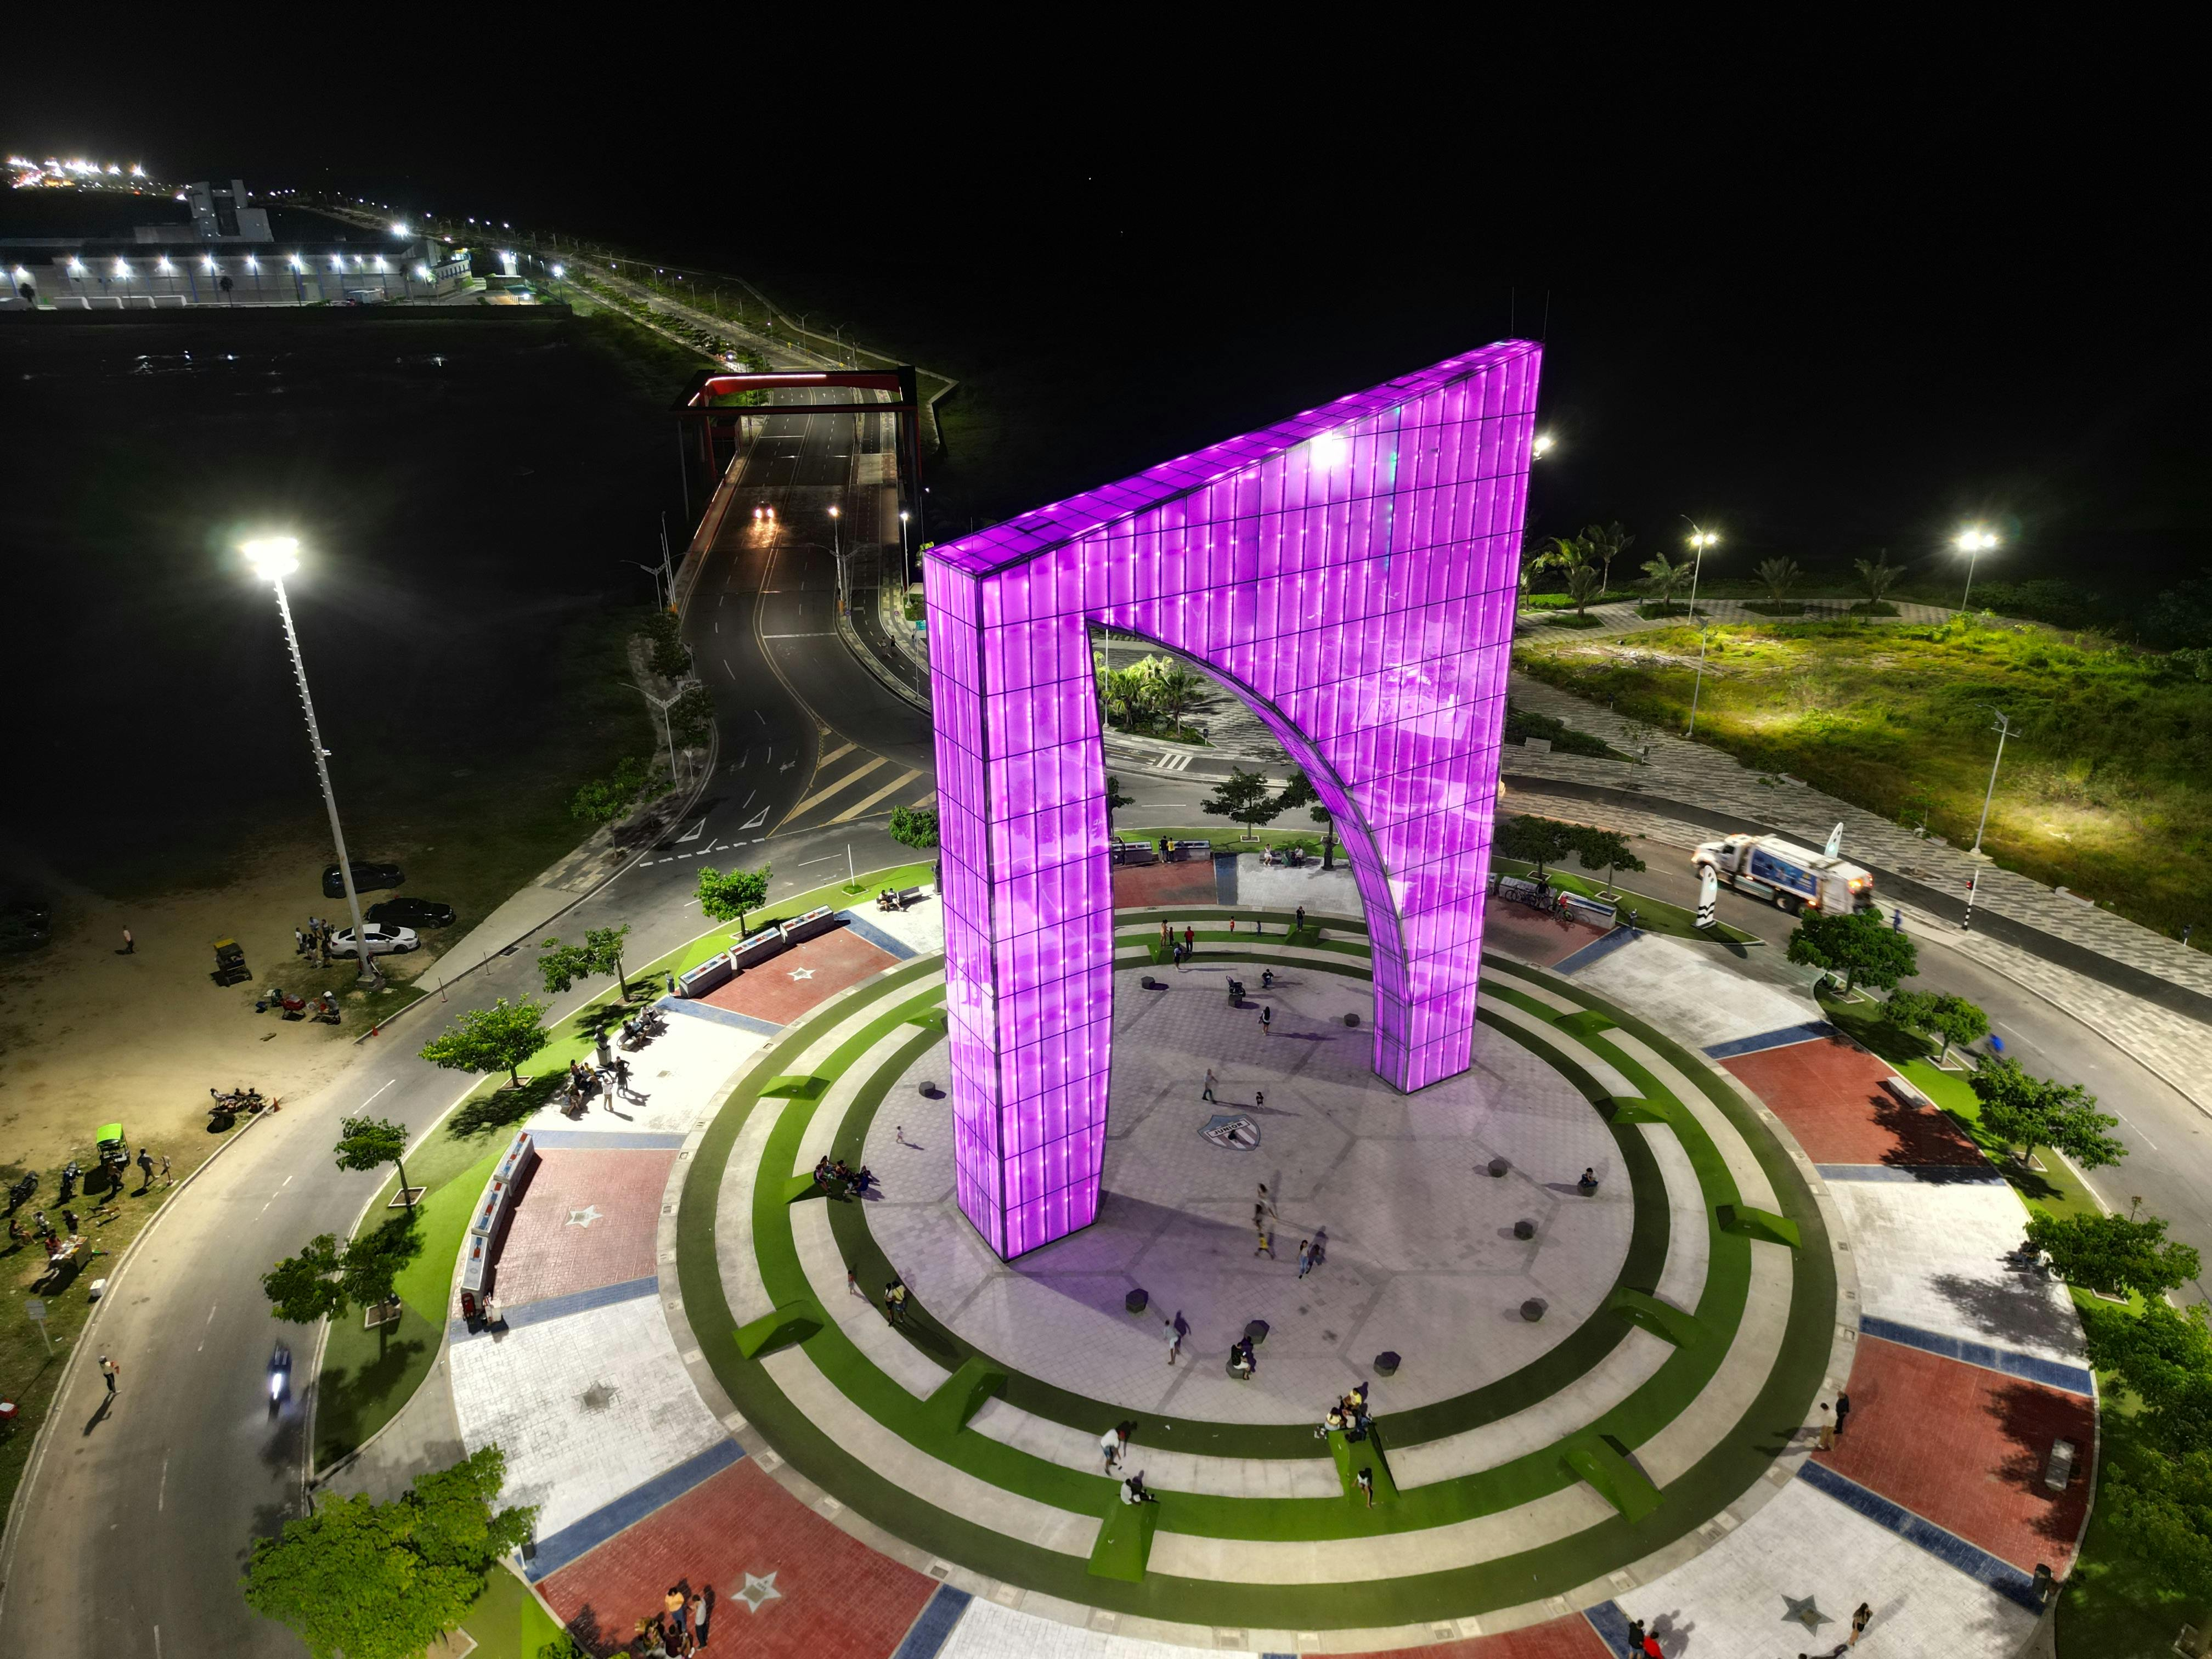

In [62]:
from IPython.display import Image
from IPython.core.display import HTML

img = Image('aleta_tiburon.jpg')
img

In [59]:
model = genai.GenerativeModel('gemini-pro-vision')

In [63]:
respuesta = model.generate_content(img)

In [64]:
to_markdown(respuesta.text)

>  The image shows a monument in the shape of a large purple arch. It is located in a public square with a circular plaza in front of it. The plaza is surrounded by palm trees and there is a road with cars driving on it in the background. The monument is lit up at night and there are people walking around it.

Para proporcionar texto e imágenes en un mensaje, pase una lista que contenga las cadenas y las imágenes:

In [65]:
respuesta = model.generate_content(
    [
        "Escribe una publicación de blog breve y atractiva basada en esta imagen. Debe incluir una descripción del lugar de la foto y hablar sobre un plan para divertirse en ese lugar",
        img
    ], stream=True
)
respuesta.resolve()

In [66]:
to_markdown(respuesta.text)

>  **¡Descubre la belleza de Puerto Vallarta desde una nueva perspectiva!**
> 
> ¿Estás buscando una forma única y emocionante de experimentar Puerto Vallarta? ¡Entonces no te pierdas la oportunidad de visitarla de noche!
> 
> La ciudad se transforma por completo cuando el sol se pone. Las calles se llenan de vida, los

## Embeddings

[Embedding](https://developers.google.com/machine-learning/glossary?hl=es-419#embedding-vector) consiste en una técnica utilizada para representar información como una lista de números de punto flotante en una matriz (también conocido como *vector de embedding*). 

Con Gemini, puedes representar texto (palabras, oraciones y bloques de texto) en forma vectorizada, lo que facilita la comparación y el contraste de las embeddings.

Por ejemplo, dos textos que comparten un tema o sentimiento similar deben tener embeddings similares, que pueden identificarse mediante técnicas de comparación matemática como la [similitud de coseno](https://es.wikipedia.org/wiki/Similitud_coseno). 

Para obtener más información sobre cómo y por qué debería utilizar incrustaciones, consulte la [guía de embeddings](https://ai.google.dev/gemini-api/docs/embeddings).

In [5]:
# Volvamos al modelo gemini-pro y al ejemplo del Joe Arroyo

model = genai.GenerativeModel('gemini-pro')

Lo siguiente genera un embedding para una sola cadena. Proporcionaremos a la función `embed_content` el nombre del modelo, el contenido, el tipo de tarea y el título.

In [6]:
result = genai.embed_content(
    model="models/embedding-001",
    content="¿Quién es el Joe Arroyo y por qué es famoso?",
    task_type="retrieval_document",
    title="Embedding of single string")

[0.01210526, -0.0005406533, 0.006118056, 0.0391883 ... TRIMMED]


In [8]:
# 1 entrada > 1 vector de salida
print(str(result['embedding'])[:80], '... CORTADO]')

[0.01210526, -0.0005406533, 0.006118056, 0.03918831, 0.060344186, 0.023157552, 0 ... CORTADO]


Para manejar lotes de cadenas, puedes pasar una lista de cadenas dentro de `content`:

In [9]:
resultado = genai.embed_content(
    model="models/embedding-001",
    content=[
      '¿Quién es el Joe Arroyo y por qué es famoso?',
      '¿Cuándo empezó la navegación en el río Magdalena?',
      '¿Cómo puedo aprender lo básico de inteligencia artificial?'],
    task_type="retrieval_document",
    title="Embedding de un listado de cadenas")

In [11]:
# Un listado de entrada > Un listado de vectores de salida
for v in resultado['embedding']:
  print(str(v)[:80], '... CORTADO ...')

[0.013732403, -0.004975524, -0.00040746323, 0.03800078, 0.034859218, 0.024186168 ... CORTADO ...
[0.03771322, -0.004169038, -0.03670654, 0.0050601442, 0.027625408, 0.03877745, 0 ... CORTADO ...
[0.004777366, -0.044739477, -0.0121762445, 0.018998154, 0.026744112, 0.029140262 ... CORTADO ...


#### Luego podrás agregar el embedding a una base de datos vectorial

Una vez que haya generado un embedding, puedes agregar dicho embedding a una base de datos de vectores, como [Vector Search](https://cloud.google.com/vertex-ai/docs/vector-search/overview) de Google. 

Tener la información en formato de vector permite:
- Habilitar motores de búsqueda semánticos, que pueden hacer búsquedas según el significado
- Motores de recomendación más relevantes
- Realizar tareas de clasificación como análisis de sentimientos.

### Referencias adicionales
- https://www.datacamp.com/tutorial/introducing-gemini-api
- https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings/get-text-embeddings#generative-ai-get-text-embedding-python_vertex_ai_sdk